In [52]:
import gym_causal
import numpy as np
import bayespy as bae
from bayespy.nodes import Bernoulli, Beta
import bayespy.plot as bpplt
import gym
import random
import scipy.stats as st

In [118]:
class BayesBernAgent(object):
    
    def __init__(self, action_space, observation_space, reward_space):
        self.action_space = action_space
        self.observation_space = observation_space
        self.reward_space = reward_space
        self.beta_params = np.array([1, 1])
        self.p_action = st.beta.rvs(self.beta_params[0], self.beta_params[1], size=1) # initial Bernoulli params for each actions
        
    def act(self):
        return st.bernoulli.rvs(self.p_action)

    def update(self, action, observation):
        a, b = self.beta_params
        a = a + observation
        b = b + 1 - observation
        self.beta_params = np.array([np.maximum(0,a), np.maximum(b, 0)])
        self.p_action = st.beta.rvs(self.beta_params[0], self.beta_params[1], size=1) # initial Bernoulli params for each actions
        

In [121]:
n = 10000
x = np.zeros(n)
env = gym.make('gym_causal:causal-v0')
env.reset()
env.set_probs(0.8,0.2)
agent = BayesBernAgent(env.action_space, env.observation_space, env.reward_space)
for i in range(n):
    action = agent.act()
    obs, reward, done, _ = env.step(action)
    #print('obs', obs, 'reward', reward)
    a, b = agent.beta_params
    x[i] = agent.p_action
    agent.update(action, obs)

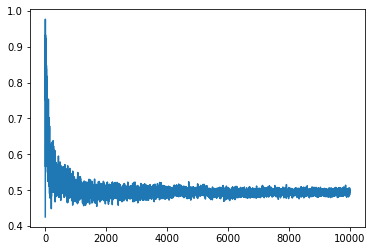

In [122]:
import matplotlib.pyplot as plt
plt.plot(np.arange(n), x)